In [1]:
# Import libraries

import warnings
import urllib.request
from pathlib import Path
import os

import torch
import scgpt as scg
import scanpy as sc
import numpy as np
import pandas as pd
import gdown

warnings.filterwarnings("ignore")

/home/pablo/miniconda3/envs/envTFG/lib/python3.10/site-packages/scgpt/model/model.py:21: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")
/home/pablo/miniconda3/envs/envTFG/lib/python3.10/site-packages/scgpt/model/multiomic_model.py:19: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")


In [2]:
warnings.simplefilter("ignore", ResourceWarning)
warnings.filterwarnings("ignore", category=ImportWarning)

output_dir = "../Experimentacion/save/scGPT_human"
if os.path.exists(output_dir):
    print("model checkpoint already downloaded!!")
else:
    # Use gdown with the recursive flag to download the folder
    # Replace the folder ID with the ID of your folder
    folder_id = "1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y"
    # Download the folder and its contents recursively
    gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", output=output_dir, quiet=False)

model checkpoint already downloaded!!


In [3]:
# This code downloads the data temporarily
uri = "https://datasets.cellxgene.cziscience.com/f50deffa-43ae-4f12-85ed-33e45040a1fa.h5ad"
source_path = "../Experimentacion/data/source.h5ad"
urllib.request.urlretrieve(uri, filename=source_path)
adata = sc.read_h5ad(source_path)

batch_key = "sample"
N_HVG = 3000

"""
    Filtramos el dataset para obtener aquellos genes con una mayor variabilidad y que más
    info nos aportan
"""
sc.pp.highly_variable_genes(adata, n_top_genes=N_HVG, flavor='seurat_v3')
adata_hvg = adata[:, adata.var['highly_variable']]

In [4]:
adata_hvg.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,highly_variable,highly_variable_rank,means,variances,variances_norm
ensemble,,,,,,,,,,,,,,,
ENSG00000177757,0.001657,0.001764,0.001811,0.974021,0,False,FAM87B,NCBITaxon:9606,gene,1947,True,1368.0,0.000524,0.000336,1.548999
ENSG00000187634,0.052457,0.238785,0.077645,3.075354,1,False,SAMD11,NCBITaxon:9606,gene,4172,True,987.0,0.013083,0.009766,1.713976
ENSG00000188290,0.553893,3.762157,0.945983,3.976981,1,False,HES4,NCBITaxon:9606,gene,1118,True,672.0,0.146175,0.108935,1.940047
ENSG00000205231,0.001380,0.001600,0.001500,1.066529,0,False,TTLL10-AS1,NCBITaxon:9606,gene,3532,True,874.0,0.000370,0.000254,1.776753
ENSG00000186891,0.002043,0.002812,0.002254,1.247330,0,False,TNFRSF18,NCBITaxon:9606,gene,1271,True,1575.0,0.000667,0.000389,1.489748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907,5.742463,34.441153,31.108465,1.107131,0,False,MT-ND4L,NCBITaxon:9606,gene,297,True,1636.0,0.973165,0.335829,1.475150
ENSG00000198886,113.644948,9042.810150,8455.856540,1.069414,0,False,MT-ND4,NCBITaxon:9606,gene,1378,True,1574.0,3.546317,0.375128,1.489772
ENSG00000198786,34.738211,863.889771,837.550675,1.031448,0,False,MT-ND5,NCBITaxon:9606,gene,1812,True,1313.0,2.417865,0.417605,1.568644


In [5]:
#warnings.simplefilter("ignore", ResourceWarning)



model_dir = Path("/home/pablo/git/Transformers-Architecture-in-Bioinformatics/Experimentacion/save/scGPT_human")



gene_col = "feature_name"
cell_type_key = "cell_type"

ref_embed_adata = scg.tasks.embed_data(
    adata_hvg,
    model_dir,
    gene_col=gene_col,
    obs_to_save=cell_type_key,  # optional arg, only for saving metainfo
    batch_size=64,
    return_new_adata=True,
)

scGPT - INFO - match 2660/3000 genes in vocabulary of size 60697.


Embedding cells: 100%|██████████| 174/174 [46:12<00:00, 15.93s/it]


Los embeddings generados se guardan en X y tienen una dimensión de 512

In [24]:
ref_embed_adata.X.shape

ref_embed_adata

AnnData object with n_obs × n_vars = 11103 × 512
    obs: 'cell_type'
    uns: 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [7]:
sc.pp.neighbors(ref_embed_adata, use_rep="X")
sc.tl.umap(ref_embed_adata)

Ponemos tanto el umap calculado como los embeddings en el objeto AnnData original

In [8]:
adata.obsm["X_scgpt"] = ref_embed_adata.X
adata.obsm["X_umap"] = ref_embed_adata.obsm["X_umap"]


In [9]:
# Add the current index ('ensembl_id') as a new column
adata.var['ensembl_id'] = adata.var.index

# Set the new index to the 'feature_name' column
adata.var.set_index('feature_name', inplace=True)

In [10]:
# Add a copy of the gene symbols back to the var dataframe
adata.var['gene_symbol'] = adata.var.index

Antes que nada nos asegurarmos de guardar el objeto AnnData para no tener que repetir los cálculos de nuevo.

In [26]:
adata.write("/home/pablo/git/Transformers-Architecture-in-Bioinformatics/Experimentacion/scGPT_embeddings/first_get_started_embeddings.h5ad")

In [28]:
adata_prueba = sc.read("/home/pablo/git/Transformers-Architecture-in-Bioinformatics/Experimentacion/scGPT_embeddings/first_get_started_embeddings.h5ad")

adata_prueba

AnnData object with n_obs × n_vars = 11103 × 33118
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell_line', 'epcam_positive', 'vim_positive', 'condition_new', 'annotation_res0.34_new2', 'annotation_res0.34_simple2', 'compartment_new2', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'donor_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'ensembl_id', 'gene_symbol'
    uns: 'anno

In [13]:
output_umap = "genEmbeddings_figures"
os.makedirs(output_umap, exist_ok=True)
sc.settings.figdir = output_umap

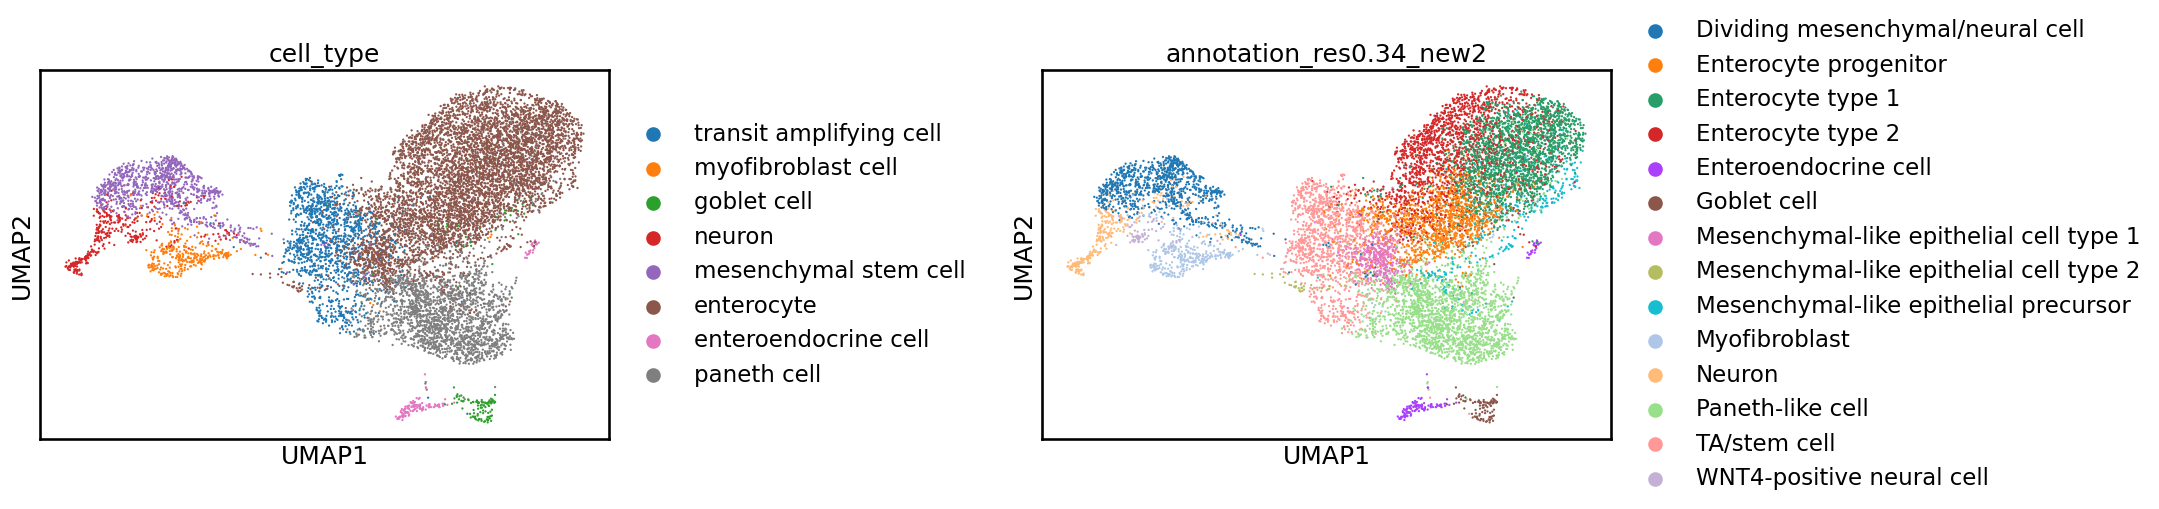

In [14]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    #sc.pp.neighbors(ref_embed_adata, use_rep="X")
    #sc.tl.umap(ref_embed_adata)
    sc.pl.umap(adata, color=["cell_type", "annotation_res0.34_new2"], wspace = 0.6, save="get_started_umap.png")

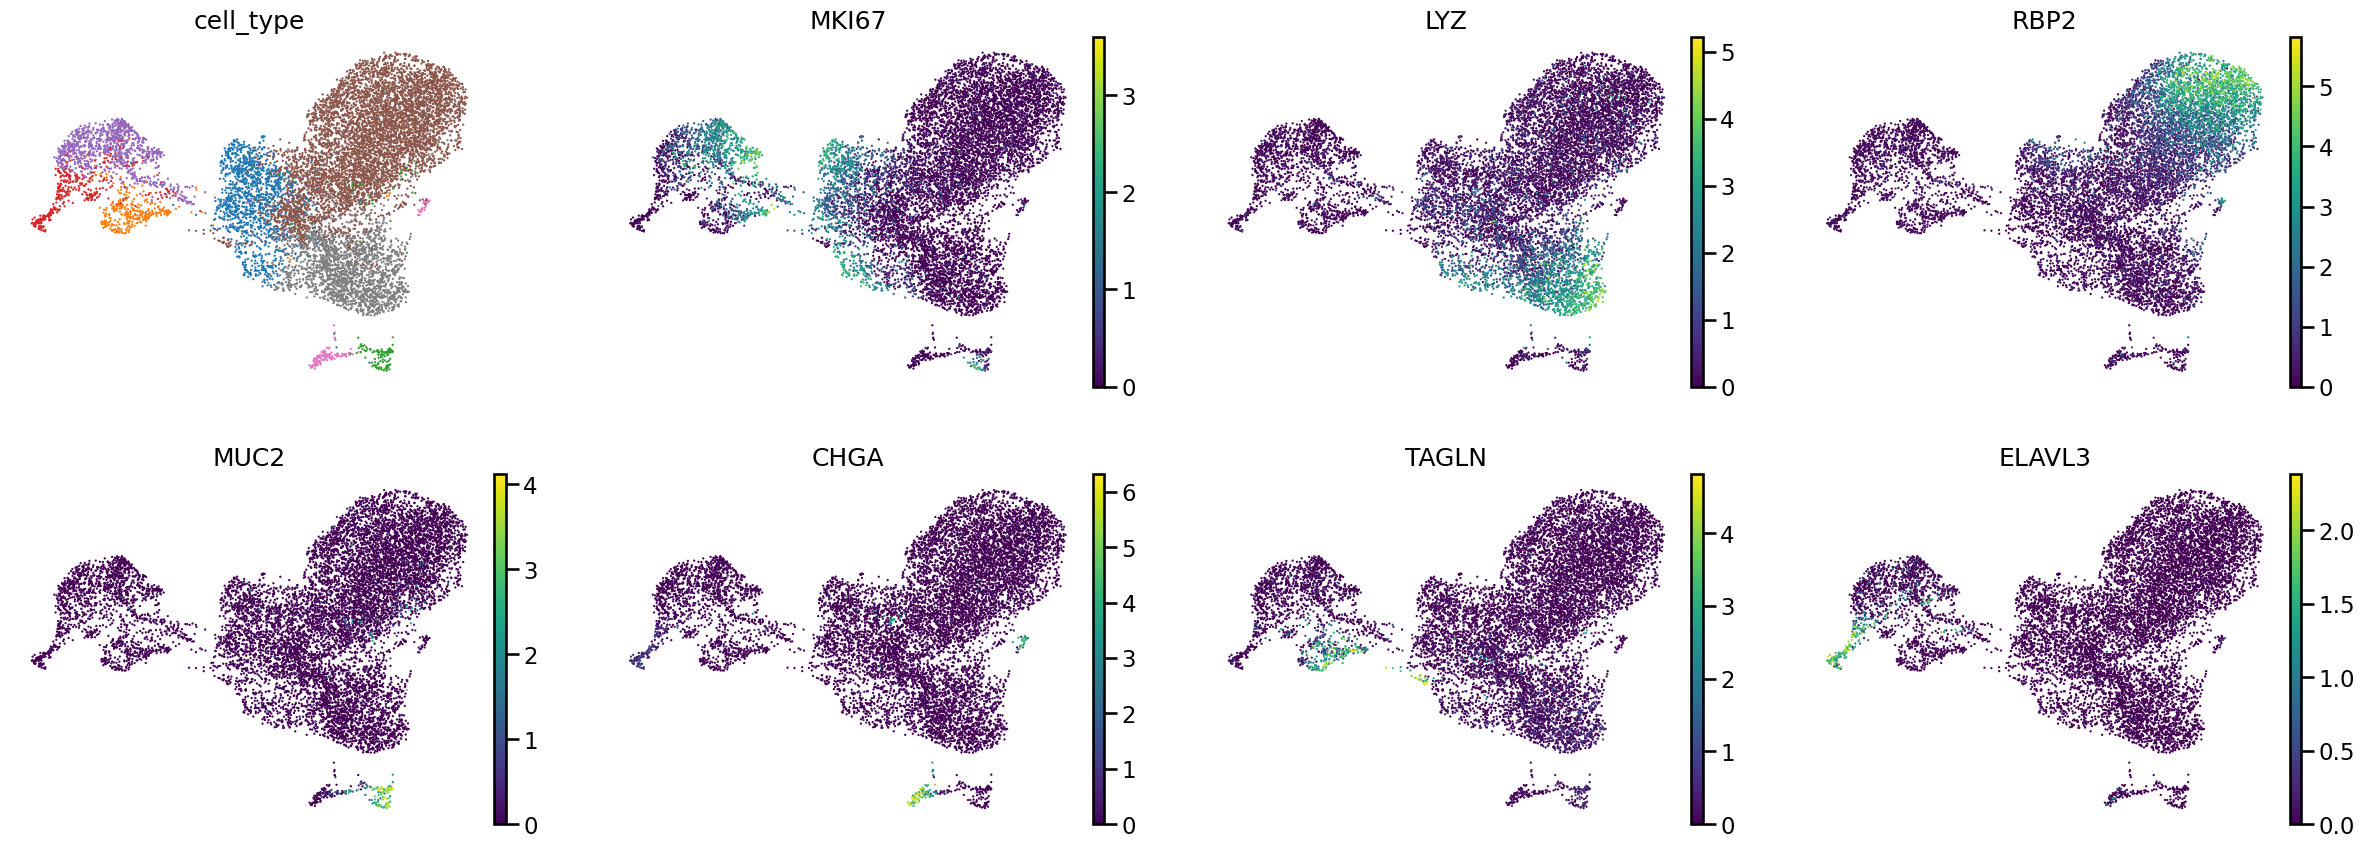

In [15]:
sc.pl.umap(adata, color=['cell_type', 'MKI67', 'LYZ', 'RBP2', 'MUC2', 'CHGA', 'TAGLN', 'ELAVL3'], frameon=False, use_raw=False, legend_fontsize ="xx-small", legend_loc="none", save="get_started_markers.png")